In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from keras.preprocessing import image
import pandas as pd
plt.style.use('seaborn')

In [33]:
def showImage(img):
    plt.imshow(img.astype('uint8'))
    plt.axis('off')
    plt.show()

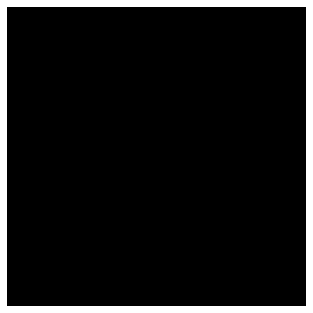

In [42]:
black_back = np.zeros((430,430,3))
showImage(black_back)

center_img_shape = 100
img_top_left = Image.open("top_left.jpg").resize((200,200))
img_top_right = Image.open("top_right.jpg").resize((200,200))
img_bottom_left = Image.open("bottom_left.jpg").resize((200,200))
img_bottom_right = Image.open("bottom_right.jpg").resize((200,200))
img_center = Image.open("center.jpeg").resize((center_img_shape,center_img_shape))

In [43]:
array_top_left = image.img_to_array(img_top_left)
array_top_right = image.img_to_array(img_top_right)
array_bottom_left = image.img_to_array(img_bottom_left)
array_bottom_right = image.img_to_array(img_bottom_right)
array_center = np.zeros((center_img_shape+20,center_img_shape+20,3))
array_center[10:center_img_shape+10,10:center_img_shape+10,:] = image.img_to_array(img_center,dtype=np.int)

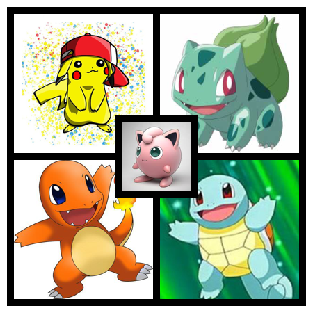

In [44]:
black_back[10:210,10:210,:] = array_top_left
black_back[10:210,220:420,:] = array_top_right
black_back[220:420,10:210,:] = array_bottom_left
black_back[220:420,220:420,:] = array_bottom_right
black_back[215-(center_img_shape//2+10):215+(center_img_shape//2+10),215-(center_img_shape//2+10):215+(center_img_shape//2+10),:] = array_center
showImage(black_back)

In [47]:
black_back = black_back.reshape((-1,3))
black_back = np.array(black_back)

In [48]:
pd.DataFrame(black_back,columns=['r','g','b']).to_csv("Instagram Photo Collage.csv",index=False)

In [59]:
original_image = Image.open("sample_image.jpg").resize((430,430))
array_org = image.img_to_array(original_image).reshape((-1,3))
pd.DataFrame(array_org,columns=['r','g','b']).to_csv("Instagram Photo Collage2.csv",index=False)

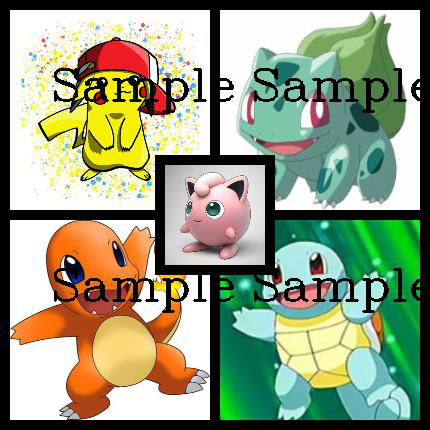

In [60]:
original_image